In [29]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [30]:
t = torch.linspace(0, 1, 4)
ts = torch.linspace(0, 1, 101)
p = torch.rand(4)

In [31]:
def cubic_bezier(p, ts):
    return (1-ts)**3*p[0] + 3*(1-ts)**2*ts*p[1]+3*(1-ts)*ts**2*p[2]+ts**3*p[3]

In [32]:
b = cubic_bezier(p, ts)

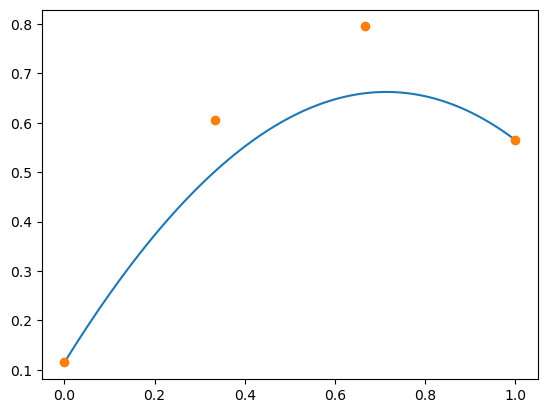

In [33]:
plt.plot(ts, b)
plt.plot(t, p, 'o')

In [34]:
p_con = torch.rand(4).requires_grad_(True)

In [35]:
optimizer = torch.optim.SGD([p_con], lr=0.01)

In [36]:
def loss_fn(target, predict):
    return torch.norm(target - predict)

In [37]:
loss_array = []
pre_loss = 100
for i in range(1000):
    b_pre = cubic_bezier(p_con, ts)
    # x_pre = cubic_interp(coff, u, us)

    loss = loss_fn(b_pre, b)
    loss.backward()
    print(p_con.grad)
    optimizer.step()
    optimizer.zero_grad()
    if abs(loss.detach() - pre_loss) < 0.0001:
        loss_array.append(loss.detach())
        break
    pre_loss = loss.detach()
    loss_array.append(pre_loss)

tensor([-1.9837, -2.4531, -1.3363,  1.1353])
tensor([-1.8291, -2.3957, -1.2879,  1.2351])
tensor([-1.6583, -2.3310, -1.2378,  1.3311])
tensor([-1.4720, -2.2590, -1.1867,  1.4205])
tensor([-1.2716, -2.1805, -1.1359,  1.5002])
tensor([-1.0597, -2.0964, -1.0865,  1.5671])
tensor([-0.8399, -2.0086, -1.0401,  1.6182])
tensor([-0.6168, -1.9192, -0.9981,  1.6513])
tensor([-0.3952, -1.8307, -0.9617,  1.6651])
tensor([-0.1802, -1.7457, -0.9319,  1.6594])
tensor([ 0.0236, -1.6664, -0.9090,  1.6350])
tensor([ 0.2125, -1.5947, -0.8925,  1.5942])
tensor([ 0.3837, -1.5317, -0.8817,  1.5395])
tensor([ 0.5357, -1.4781, -0.8749,  1.4743])
tensor([ 0.6676, -1.4338, -0.8701,  1.4019])
tensor([ 0.7793, -1.3984, -0.8648,  1.3253])
tensor([ 0.8712, -1.3711, -0.8563,  1.2472])
tensor([ 0.9437, -1.3508, -0.8411,  1.1691])
tensor([ 0.9966, -1.3359, -0.8151,  1.0915])
tensor([ 1.0291, -1.3242, -0.7728,  1.0132])
tensor([ 1.0382, -1.3122, -0.7065,  0.9298])
tensor([ 1.0176, -1.2929, -0.6050,  0.8330])
tensor([ 0

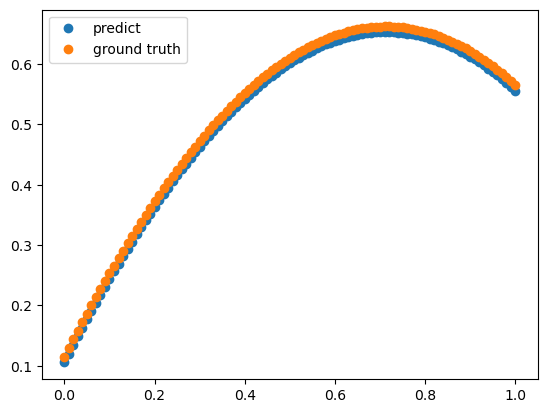

In [38]:
plt.plot(ts, b_pre.detach(), 'o', label='predict')
plt.plot(ts, b, 'o', label='ground truth')
plt.legend()